Data Kompetisi Angkatan 2022 untuk Kebutuhan PILMAPRES 2025

Contoh:


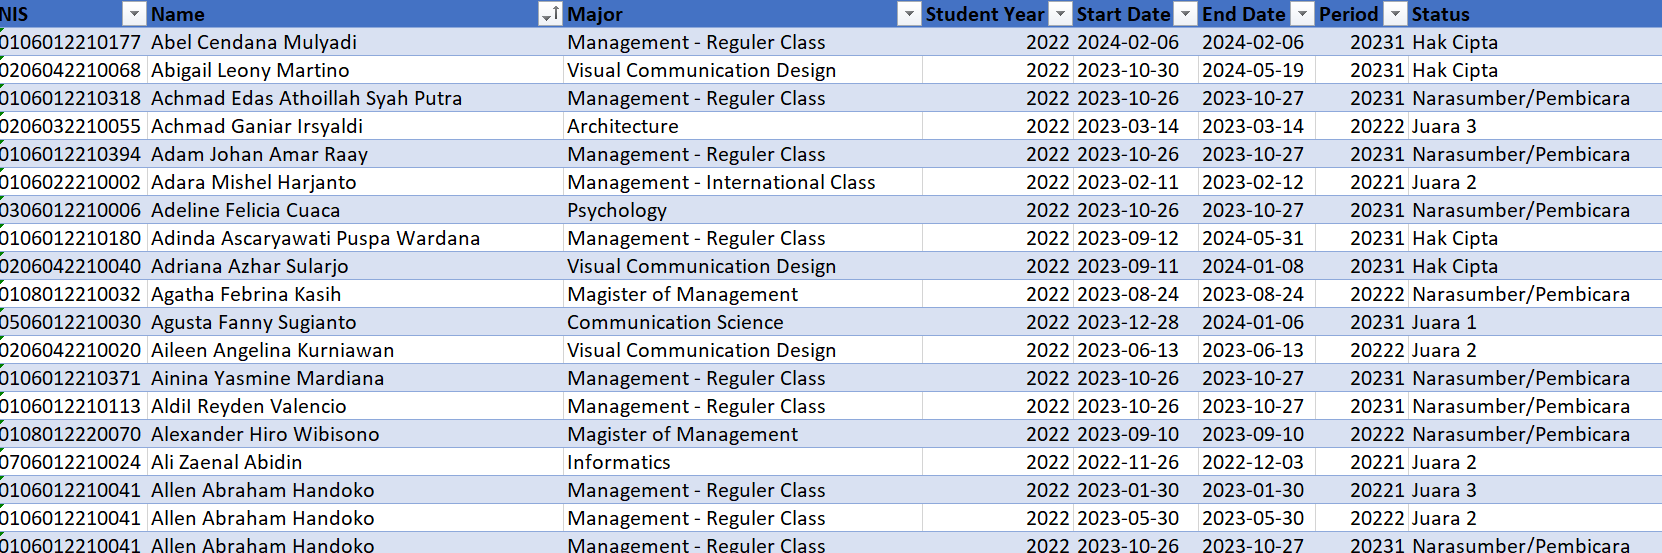

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [26]:
df = pd.read_csv('pilmapres.csv', encoding='utf-8', encoding_errors='ignore', delimiter=";", dtype={'NIS': str})
df.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Competition Level,Field,Placement,Team Category,Criteria,Submissions per Student per Field,Submissions per Student,Score
0,0106012210177,Abel Cendana Mulyadi,Management - Reguler Class,2022.0,2024-02-06,2024-02-06,20231.0,Hak Cipta,External National,Team,40.0,External National,Hasil Karya,Hak Cipta,Team,Hak Cipta|External National|Team,1.0,1.0,0.0
1,0206042210068,Abigail Leony Martino,Visual Communication Design,2022.0,2023-10-30,2024-05-19,20231.0,Hak Cipta,External National,Team,227.0,External National,Hasil Karya,Hak Cipta,Team,Hak Cipta|External National|Team,1.0,1.0,0.0
2,0106012210318,Achmad Edas Athoillah Syah Putra,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0
3,0206032210055,Achmad Ganiar Irsyaldi,Architecture,2022.0,2023-03-14,2023-03-14,20222.0,Juara 3,External International,Individual,2300.0,External International,Kompetisi,Juara 3,Individual,Juara 3|External International|Individual,1.0,1.0,35.0
4,0106012210394,Adam Johan Amar Raay,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0


In [27]:
strings_to_filter = ['External Regional', 'Regional', 'International']

# Create a regex pattern from the list of strings
pattern = '|'.join(strings_to_filter)

In [28]:
df['Level'].value_counts()

External National         142
External International    142
External Regional          74
Name: Level, dtype: int64

In [29]:
# Exclude Level HERE
df = df[~df['Level'].str.contains('External Regional', na=False)]

# Set Level HERE
# df = df[df['Level'].str.contains('External Regional', na=False)]

In [30]:
df['Major'].value_counts()

Management - Reguler Class              139
Psychology                               25
Information System                       20
Accounting                               20
Medical                                  14
Visual Communication Design              13
Architecture                             11
Magister of Management                    8
Management - International Class          8
Management S3                             6
Communication Science                     5
Informatics                               4
Magister of Management (BUF)              3
Fashion Design and Business               3
Food Technology Program                   2
Tourism - Hotel and Tourism Business      2
Tourism - Culinary Business               1
Name: Major, dtype: int64

In [31]:
# Exclude Major HERE
# df = df[~df['Major'].str.contains('Visual Communication Design', na=False)]

# Set Major HERE
# df = df[df['Major'].str.contains('Visual Communication Design', na=False)]

Data yang dimiliki sudah relatively rapi, tapi untuk membantu processing data, maka data akan di sorting awal

In [32]:
# Sorting sesuai NIS
df_sorted = df.sort_values(by=['NIS', 'Field', 'Score'], ascending=[True, True, False])
df_sorted.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Competition Level,Field,Placement,Team Category,Criteria,Submissions per Student per Field,Submissions per Student,Score
230,0106012210014,Michael Davis Guyanto,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0
79,0106012210015,Dian Natalia Halim,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0
281,0106012210021,Sebastian Brendon Huisaini,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,2.0,2.0,25.0
94,0106012210022,Febiola,Management - Reguler Class,2022.0,2023-04-12,2023-05-28,20222.0,Juara 3,External National,Individual,58.0,External National,Kompetisi,Juara 3,Individual,Juara 3|External National|Individual,1.0,3.0,15.0
96,0106012210022,Febiola,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,2.0,3.0,25.0


Untuk kebutuhan PILMAPRES 2025, telah disediakan grading rubric untuk 7 total bidang di Pedoman PILMAPRES dimana ada beberapa rules yang harus dicatat. <br>
Rule pertama adalah seorang mahasiswa tidak boleh submit more than 4 scores per bidang/field. <br>
Rule kedua adalah seorang mahasiswa tidak boleh submit 10 scores secara total untuk 7 bidang tersebut. <br><br>

Untuk penanganan data mahasiswa yang telah submit more than 4 scores per field ataupun more than 10 secara total, ada beberapa pilihan seperti mengambil 4 scores tertinggi atau terkini per field dan 10 scores tertinggi atau terkini per student. Untuk case ini, akan diambil 4 scores tertinggi per field dan 10 scores tertinggi per student secara total.

In [33]:
# Rule: Max 4 scores per field per student
# Kalau ada yang submit diatas 4 kali di 1 bidang, maka ambil 4 score tertinggi student itu at that specific field
df_filtered_field = df_sorted.groupby(['NIS', 'Field']).head(4)
df_filtered_field.head()

,NIS,Name,Major,Student Year,Start Date,End Date,Period,Status,Level,Participant As,Total Participant,Competition Level,Field,Placement,Team Category,Criteria,Submissions per Student per Field,Submissions per Student,Score
230,0106012210014,Michael Davis Guyanto,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0
79,0106012210015,Dian Natalia Halim,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,1.0,1.0,25.0
281,0106012210021,Sebastian Brendon Huisaini,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,2.0,2.0,25.0
94,0106012210022,Febiola,Management - Reguler Class,2022.0,2023-04-12,2023-05-28,20222.0,Juara 3,External National,Individual,58.0,External National,Kompetisi,Juara 3,Individual,Juara 3|External National|Individual,1.0,3.0,15.0
96,0106012210022,Febiola,Management - Reguler Class,2022.0,2023-10-26,2023-10-27,20231.0,Narasumber/Pembicara,External International,Individual,500.0,External International,Pengakuan,Narasumber/Pembicara,Individual,Narasumber/Pembicara|External International|In...,2.0,3.0,25.0


In [34]:
df_filtered_field['Level'].value_counts()

External International    142
External National         138
Name: Level, dtype: int64

In [35]:
df_filtered_field['Status'].value_counts()

Narasumber/Pembicara                                                                        131
Hak Cipta                                                                                    43
Juara 3                                                                                      33
Juara 2                                                                                      27
Juara 1                                                                                      19
Penulis Utama/korespondensi karya ilmiah di journal yg bereputasi dan diakui                 12
Penulis kedua (bukan korespondensi) dst karya ilmiah di journal yg bereputasi dan diakui     11
Buku Ber-ISBN Penulis Utama                                                                   3
Pelatih/Wasit/Juri Tidak Berlisensi                                                           1
Name: Status, dtype: int64

In [36]:
df_filtered_field['Period'].value_counts()

20231.0    170
20222.0     54
20232.0     32
20221.0     19
20212.0      5
Name: Period, dtype: int64

In [37]:
df_filtered_field['Major'].value_counts()

Management - Reguler Class              139
Psychology                               25
Information System                       20
Accounting                               17
Medical                                  14
Visual Communication Design              13
Architecture                             11
Magister of Management                    8
Management - International Class          8
Management S3                             5
Communication Science                     5
Informatics                               4
Magister of Management (BUF)              3
Fashion Design and Business               3
Tourism - Hotel and Tourism Business      2
Food Technology Program                   2
Tourism - Culinary Business               1
Name: Major, dtype: int64

In [38]:
# Sum of scores per bidang per student
df_field_totals = df_filtered_field.groupby(['NIS', 'Name', 'Major', 'Field'])['Score'].sum().reset_index()
df_field_totals.head()

,NIS,Name,Major,Field,Score
0,0106012210014,Michael Davis Guyanto,Management - Reguler Class,Pengakuan,25.0
1,0106012210015,Dian Natalia Halim,Management - Reguler Class,Pengakuan,25.0
2,0106012210021,Sebastian Brendon Huisaini,Management - Reguler Class,Pengakuan,25.0
3,0106012210022,Febiola,Management - Reguler Class,Kompetisi,15.0
4,0106012210022,Febiola,Management - Reguler Class,Pengakuan,25.0


In [39]:
# Sum of scores per student
df_total_scores_per_student = df_field_totals.groupby(['NIS', 'Name', 'Major'])['Score'].sum().reset_index()
df_total_scores_per_student.head()

,NIS,Name,Major,Score
0,0106012210014,Michael Davis Guyanto,Management - Reguler Class,25.0
1,0106012210015,Dian Natalia Halim,Management - Reguler Class,25.0
2,0106012210021,Sebastian Brendon Huisaini,Management - Reguler Class,25.0
3,0106012210022,Febiola,Management - Reguler Class,40.0
4,0106012210023,Michelle Angel,Management - Reguler Class,25.0


In [40]:
# Sorting sesuai score tertinggi (Descending)
df_total_scores_per_student_sorted = df_total_scores_per_student.sort_values(by='Score', ascending=False)
print(df_total_scores_per_student_sorted)

               NIS                           Name  \
125  0106042210012        Kenley Maccauley Riyono   
139  0109012220012                    Ivan Suaidi   
10   0106012210034                Calvin Chandoko   
124  0106042210008               Nicklaus Stanley   
118  0106022210003    Teresa Samantha Satyanegara   
..             ...                            ...   
167  0306012210028                  Grace Carolyn   
171  0306012210051              Elda Awalia Husna   
177  0406042210006                   Hans Rachman   
178  0406042210011  Levani Delsie Putri Pangalila   
148  0206042210013  Jesslyn Aprillianefata Schand   

                                Major  Score  
125                        Accounting  195.0  
139                     Management S3  104.0  
10         Management - Reguler Class   90.0  
124                        Accounting   80.0  
118  Management - International Class   80.0  
..                                ...    ...  
167                        Psychol

Untuk PILMAPRES 2025, best case scenario adalah untuk menutuskan sekitar 10 anak untuk mewakili UC, maka hasil akan di filter untuk menunjukkan 10 mahasiswa dengan score tertinggi.

In [41]:
# Untuk kebutuhan pilmapres 2025, ambil 10 students dengan score tertinggi
df_total_scores_per_student_filtered = df_total_scores_per_student_sorted.head(10)
print(df_total_scores_per_student_filtered)

               NIS                         Name  \
125  0106042210012      Kenley Maccauley Riyono   
139  0109012220012                  Ivan Suaidi   
10   0106012210034              Calvin Chandoko   
124  0106042210008             Nicklaus Stanley   
118  0106022210003  Teresa Samantha Satyanegara   
189  0606012210041          Vajra Yeshie Kusala   
12   0106012210041        Allen Abraham Handoko   
203  0706022210032    Immanuel Nissi Krissianto   
182  0506012210045                      Tao Zen   
208  0706022210051   Theo Filus Handy Syahputra   

                                Major  Score  
125                        Accounting  195.0  
139                     Management S3  104.0  
10         Management - Reguler Class   90.0  
124                        Accounting   80.0  
118  Management - International Class   80.0  
189                           Medical   73.0  
12         Management - Reguler Class   60.0  
203                Information System   55.0  
182            

In [42]:
total_scores_final = df_total_scores_per_student_filtered.groupby(['NIS', 'Name', 'Major'])['Score'].sum().reset_index()
print(total_scores_final)

             NIS                         Name  \
0  0106012210034              Calvin Chandoko   
1  0106012210041        Allen Abraham Handoko   
2  0106022210003  Teresa Samantha Satyanegara   
3  0106042210008             Nicklaus Stanley   
4  0106042210012      Kenley Maccauley Riyono   
5  0109012220012                  Ivan Suaidi   
6  0506012210045                      Tao Zen   
7  0606012210041          Vajra Yeshie Kusala   
8  0706022210032    Immanuel Nissi Krissianto   
9  0706022210051   Theo Filus Handy Syahputra   

                              Major  Score  
0        Management - Reguler Class   90.0  
1        Management - Reguler Class   60.0  
2  Management - International Class   80.0  
3                        Accounting   80.0  
4                        Accounting  195.0  
5                     Management S3  104.0  
6             Communication Science   55.0  
7                           Medical   73.0  
8                Information System   55.0  
9         

In [43]:
res = total_scores_final.sort_values(by='Score', ascending=False)

res.columns = ['NIS', 'Name', 'Major', 'Total_Score']

print(res)

             NIS                         Name  \
4  0106042210012      Kenley Maccauley Riyono   
5  0109012220012                  Ivan Suaidi   
0  0106012210034              Calvin Chandoko   
2  0106022210003  Teresa Samantha Satyanegara   
3  0106042210008             Nicklaus Stanley   
7  0606012210041          Vajra Yeshie Kusala   
1  0106012210041        Allen Abraham Handoko   
6  0506012210045                      Tao Zen   
8  0706022210032    Immanuel Nissi Krissianto   
9  0706022210051   Theo Filus Handy Syahputra   

                              Major  Total_Score  
4                        Accounting        195.0  
5                     Management S3        104.0  
0        Management - Reguler Class         90.0  
2  Management - International Class         80.0  
3                        Accounting         80.0  
7                           Medical         73.0  
1        Management - Reguler Class         60.0  
6             Communication Science         55.0  
8

In [44]:
output_path = 'C:\\Users\\hansj\\OneDrive\\Documents\\Student Affairs\\Projects\\PILMAPRES\\Angkatan 2022\\output_2022.xlsx'
res.to_excel(output_path, index=False)

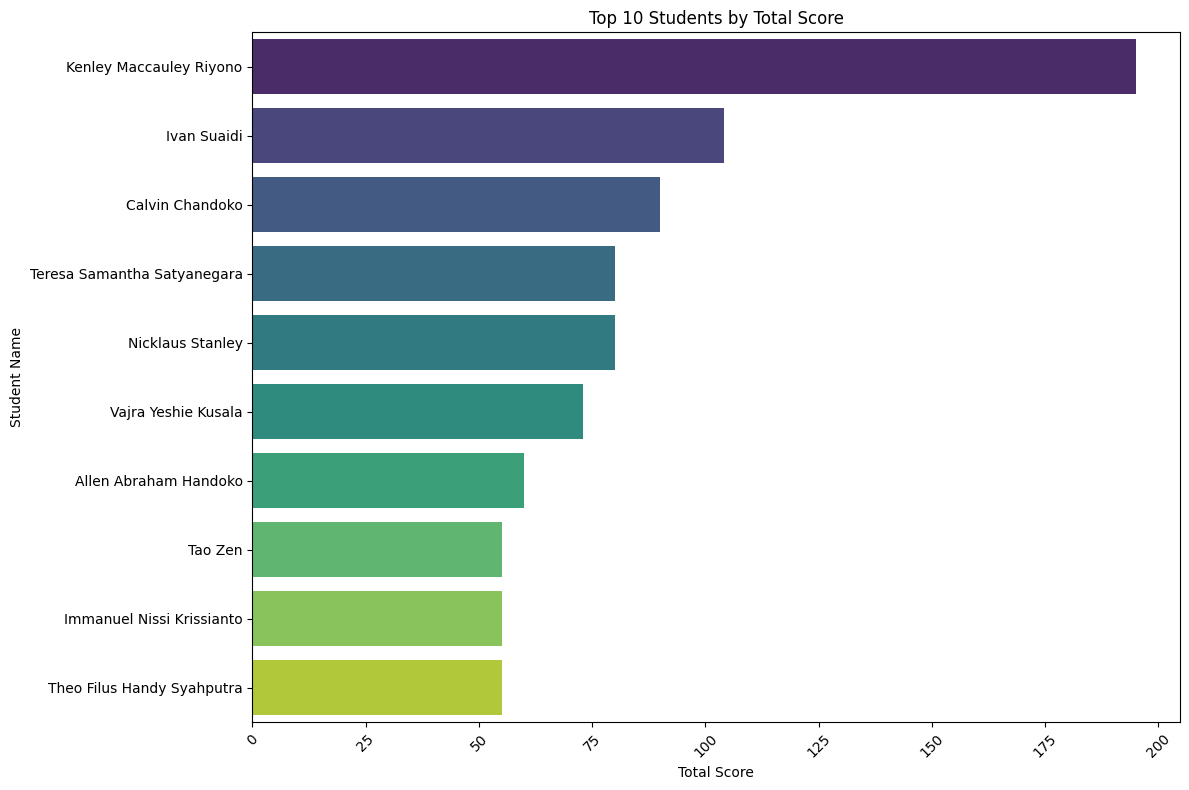

In [45]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Total_Score', y='Name', data=res, palette='viridis')
plt.title('Top 10 Students by Total Score')
plt.xlabel('Total Score')
plt.ylabel('Student Name')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pada graph ini, terlihat bahwa mahasiswa dengan score tertinggi adalah <b> Kenley Maccauley Riyono </b>, dengan sekitar <b> 195 poin </b>. Poin yang dimiliki Kenley hampir double dari posisi kedua tertinggi yaitu <b> Sulthan Ahmed Yassin Bagdadi </b> dengan sekitar <b> 115 poin </b>.

Text(0.5, 1.0, 'Score Distribution Among Top 10 Students')

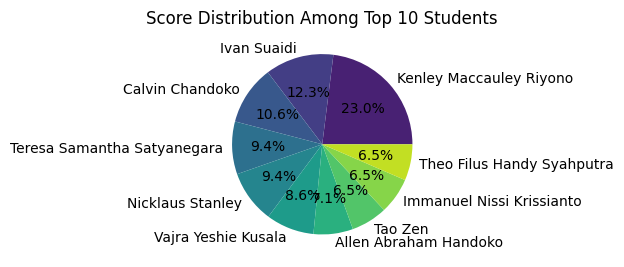

In [46]:
plt.subplot(1, 2, 2)
plt.pie(res['Total_Score'], labels=res['Name'], autopct='%1.1f%%', colors=sns.color_palette('viridis', n_colors=len(res)))
plt.title('Score Distribution Among Top 10 Students')

Di piechart diatas, dapat dilihat bahwa terdapat perbedaan yang beda dari posisi pertama (Kenley) dengan teman-temannya yang lain. <b> Data ini dapat dipakai untuk mencari tahu apa yang dapat diimprove agar dapat meningkatkan prestasi mahasiswa secara keseluruhan. </b>

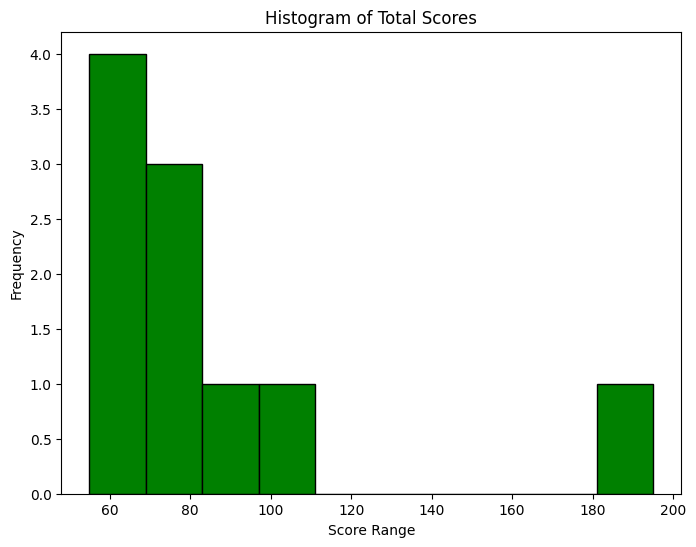

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(res['Total_Score'], bins=10, color='green', edgecolor='black')
plt.title('Histogram of Total Scores')
plt.xlabel('Score Range')
plt.ylabel('Frequency')
plt.show()


Dari histogram diatas, kita dapat melihat bahwa score-score dari mahasiswa memiliki bias ke sisi kiri yaitu ke range scoring antara 80-100. Hal ini menunjukkan bahwa nilai Kenley merupakan outlier yang sangat extreme, dimana apabila 10 mahasiswa tersebut akan mewakili UC, akan terdapat sebuah imbalance pada prospects UC.

In [48]:
res.describe()

,Total_Score
count,10.000000
mean,84.700000
std,42.169104
min,55.000000
25%,56.250000
50%,76.500000
75%,87.500000
max,195.000000


Di table diatas, mean atau rata-rate scoring untuk 10 mahasiswa tersebut hanya 101 dan median dari scoring tersebut adalah 90. Data ini membuktikan bahwa memang Kenley merupakan outlier diantara 10 mahasiswa tersebut. Apabila untuk PILMAPRES, scoring akan dirata-rata sesuai dengan jumlah anak, maka kandidat-kandidat UC akan memiliki lower chance untuk memenangkan PILMAPRES 2025.